In [ ]:
import phate
import scprep
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [31]:
adatas = {
    "pbmc3k": sc.datasets.pbmc3k_processed(),
    #"paul15": sc.datasets.paul15(),
    #"krumsiek11": sc.datasets.krumsiek11(),
    #"moignard15": sc.datasets.moignard15(),
    "pbmc68k_reduced": sc.datasets.pbmc68k_reduced(),
}

In [32]:
for i, adata in adatas.items():
    phate_op = phate.PHATE(random_state=42)
    embed = phate_op.fit_transform(adata.X)
    adatas[i].obsm["X_phate"] = embed

Calculating PHATE...
  Running PHATE on 2638 observations and 1838 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.75 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.51 seconds.
    Calculating affinities...
    Calculated affinities in 0.58 seconds.
  Calculated graph and diffusion operator in 2.85 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.50 seconds.
    Calculating KMeans...
    Calculated KMeans in 6.13 seconds.
  Calculated landmark operator in 8.06 seconds.
  Calculating optimal t...
    Automatically selected t = 5
  Calculated optimal t in 5.48 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.82 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 7.53 seconds.
Calculated PHATE in 25.76 seconds.
Calculating PHATE...
  Running PHATE on 700 observations and 765 variables.
  Calculating graph and diffusion oper

pbmc68k_reduced tsne 'X_tsne'


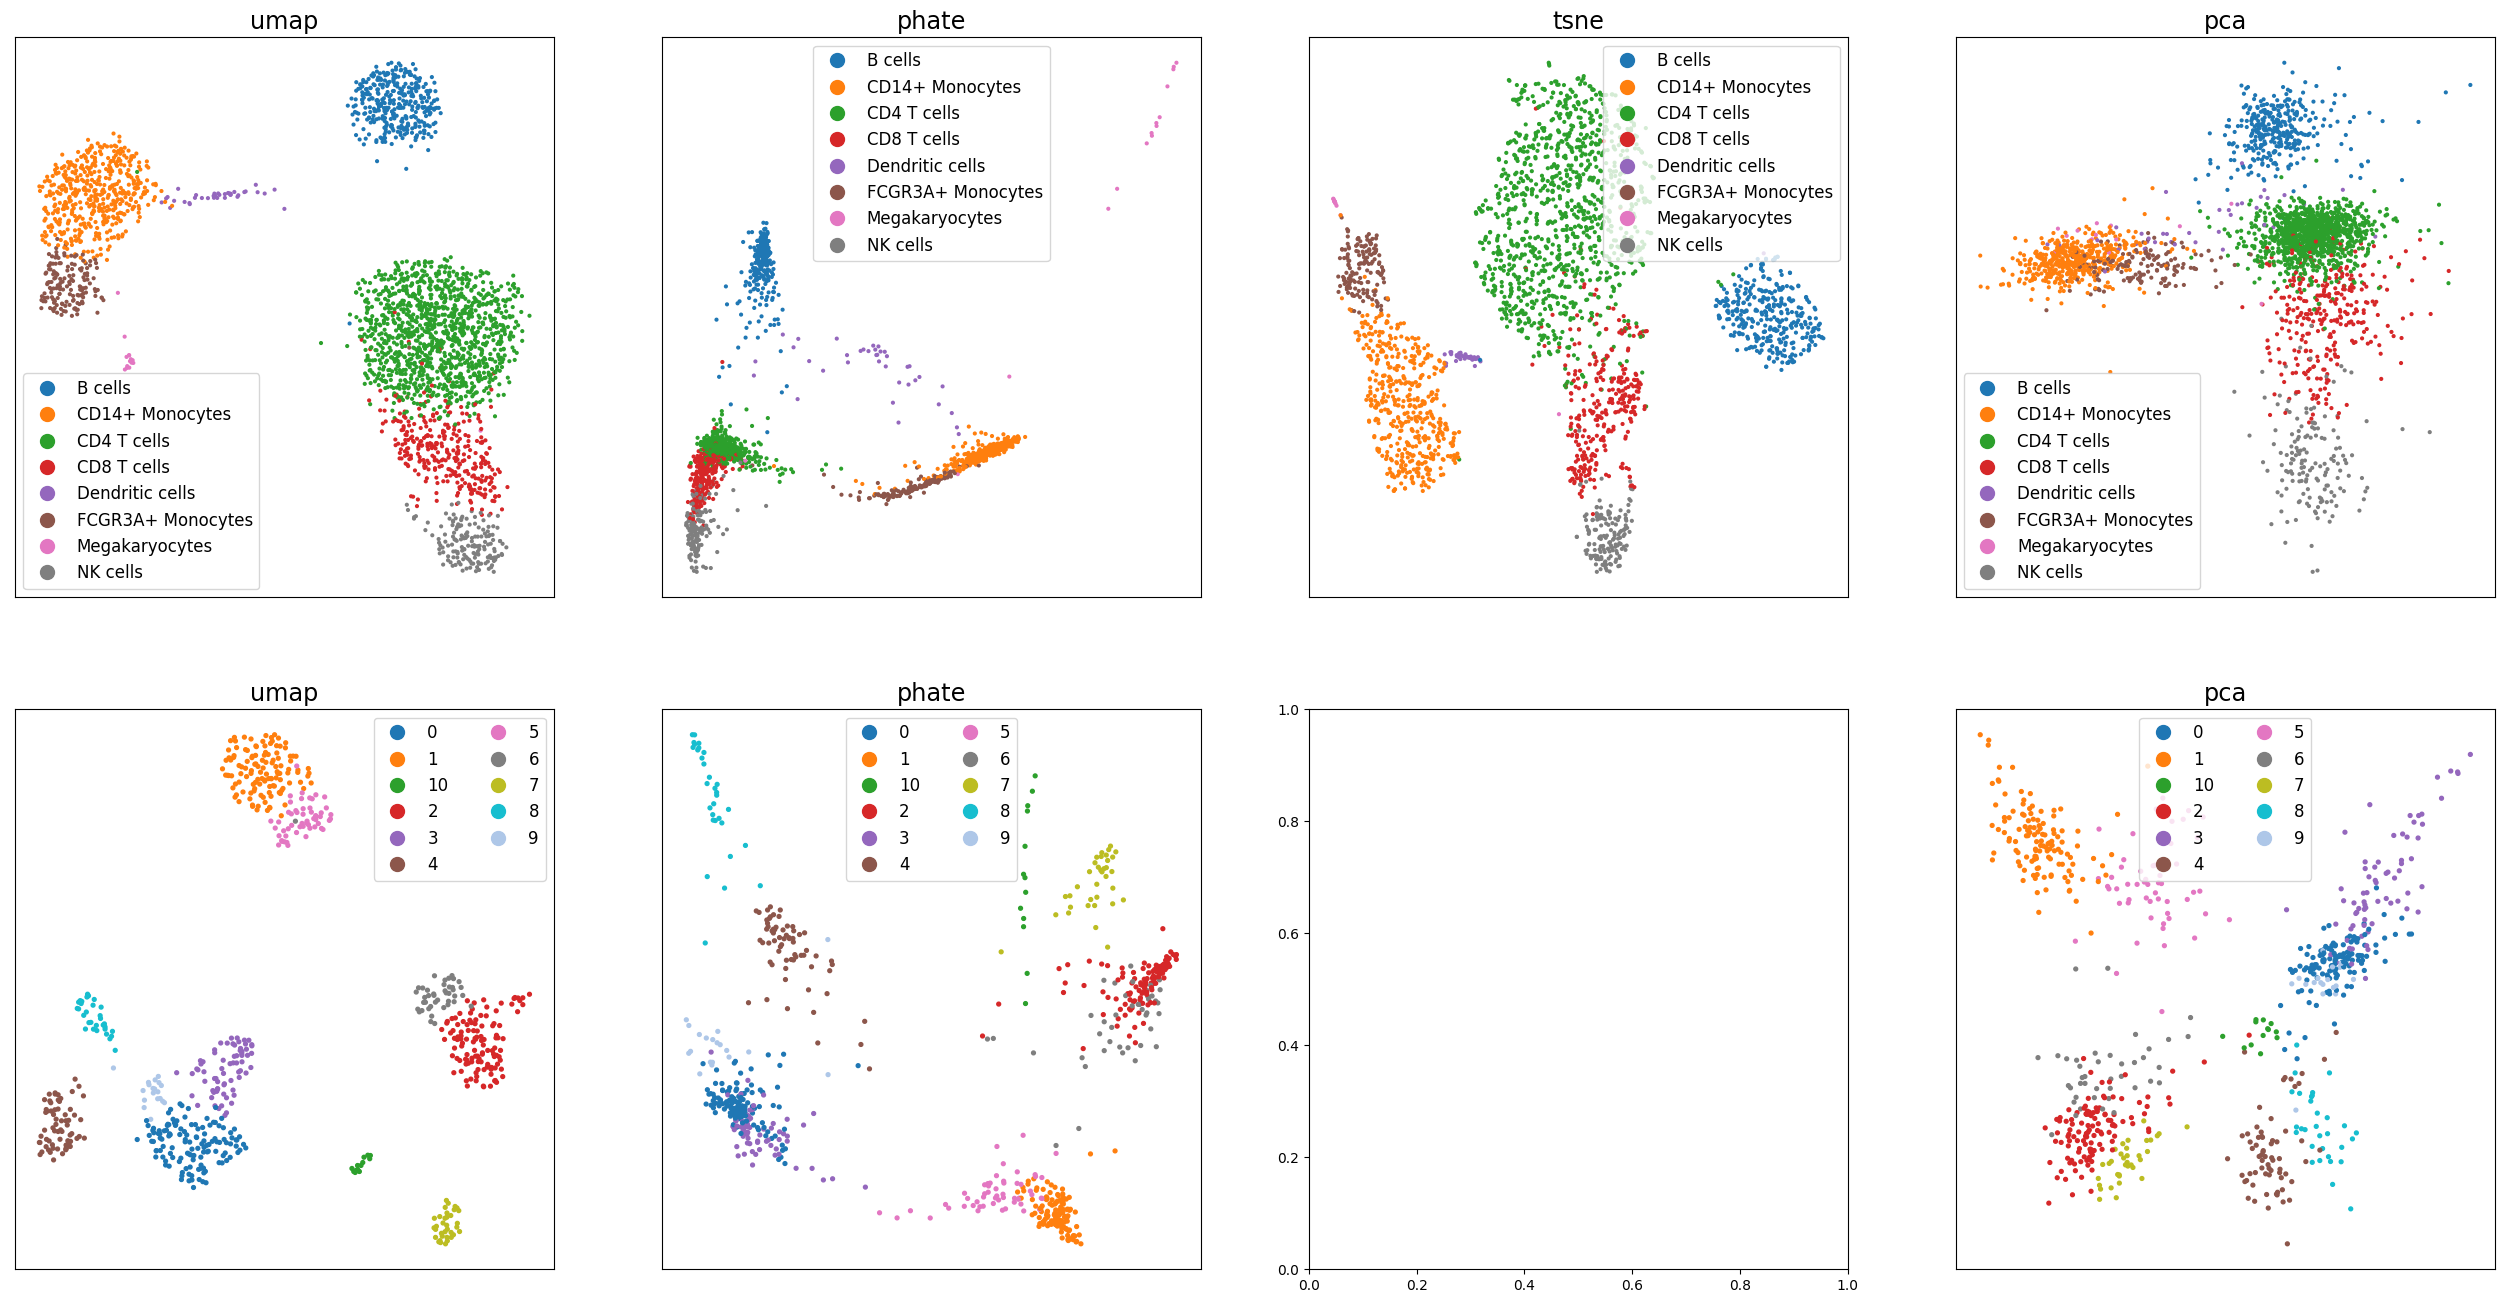

In [33]:
ndata = len(adatas)
fig, axes = plt.subplots(ndata,4,figsize=(4 * 8, ndata * 8))
#axes = axes.flatten()
for j, (name, adata) in enumerate(adatas.items()):
    for i, basis in enumerate(["umap", "phate", "tsne", "pca"]):
        try:
            scprep.plot.scatter2d(adata.obsm[f"X_{basis}"], c=adata.obs["louvain"], ax=axes[j, i], ticks=[], title=basis)
        except KeyError as exception:
            print(name, basis, exception)
            continue

In [40]:
for i, adata in adatas.items():
    phate_op = phate.PHATE(random_state=42)
    embed = phate_op.fit_transform(adata.X)
    print(phate_op.diff_potential)
    pca = PCA().fit_transform(phate_op.diff_potential)
    adatas[i].obsm["X_phate_pca"] = pca

Calculating PHATE...
  Running PHATE on 2638 observations and 1838 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.74 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.51 seconds.
    Calculating affinities...
    Calculated affinities in 0.57 seconds.
  Calculated graph and diffusion operator in 2.86 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.50 seconds.
    Calculating KMeans...
    Calculated KMeans in 6.06 seconds.
  Calculated landmark operator in 8.01 seconds.
  Calculating optimal t...
    Automatically selected t = 5
  Calculated optimal t in 5.24 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.80 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 7.37 seconds.
Calculated PHATE in 25.30 seconds.
[[ 7.98755272  7.76553536  8.05750545 ...  8.36455543  7.6263478
   7.92414147]
 [10.03909997  9.31170518 10.36363

pbmc68k_reduced tsne 'X_tsne'


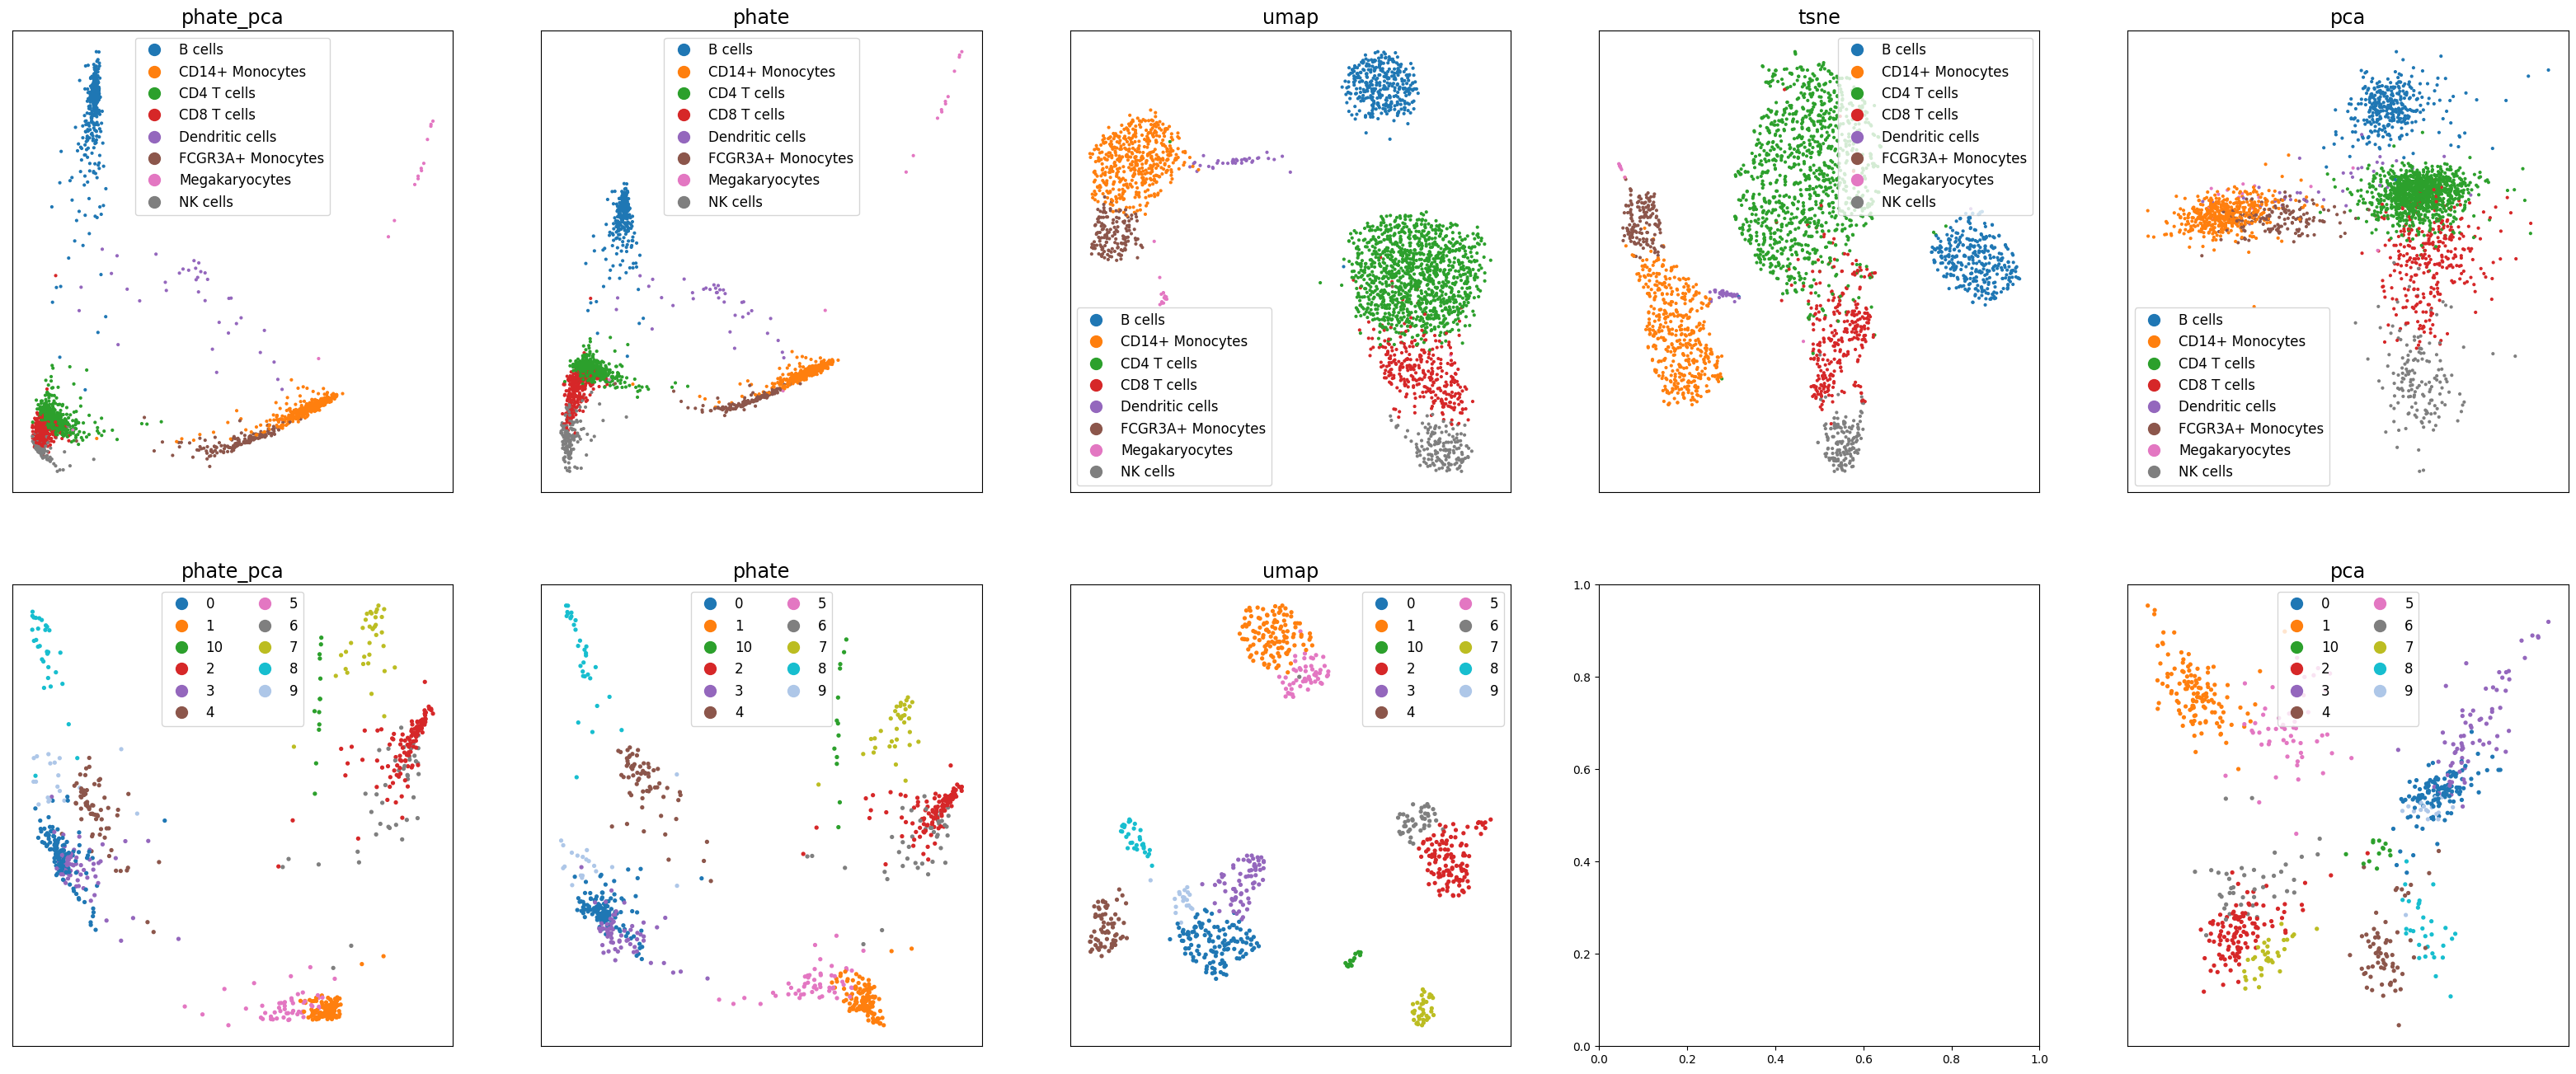

In [42]:
ndata = len(adatas)
fig, axes = plt.subplots(ndata,5,figsize=(5 * 8, ndata * 8))
#axes = axes.flatten()
for j, (name, adata) in enumerate(adatas.items()):
    for i, basis in enumerate(["phate_pca", "phate", "umap", "tsne", "pca"]):
        try:
            scprep.plot.scatter2d(adata.obsm[f"X_{basis}"], c=adata.obs["louvain"], ax=axes[j, i], ticks=[], title=basis)
        except KeyError as exception:
            print(name, basis, exception)
            continue